In [81]:
import pandas as pd

ev_data = pd.read_csv(r"G:\Python\Project\66634-ev-data\Electric_Vehicle_Population_Data.csv")

In [82]:
print(ev_data.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

In [83]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [84]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [85]:
ev_data = ev_data.dropna()

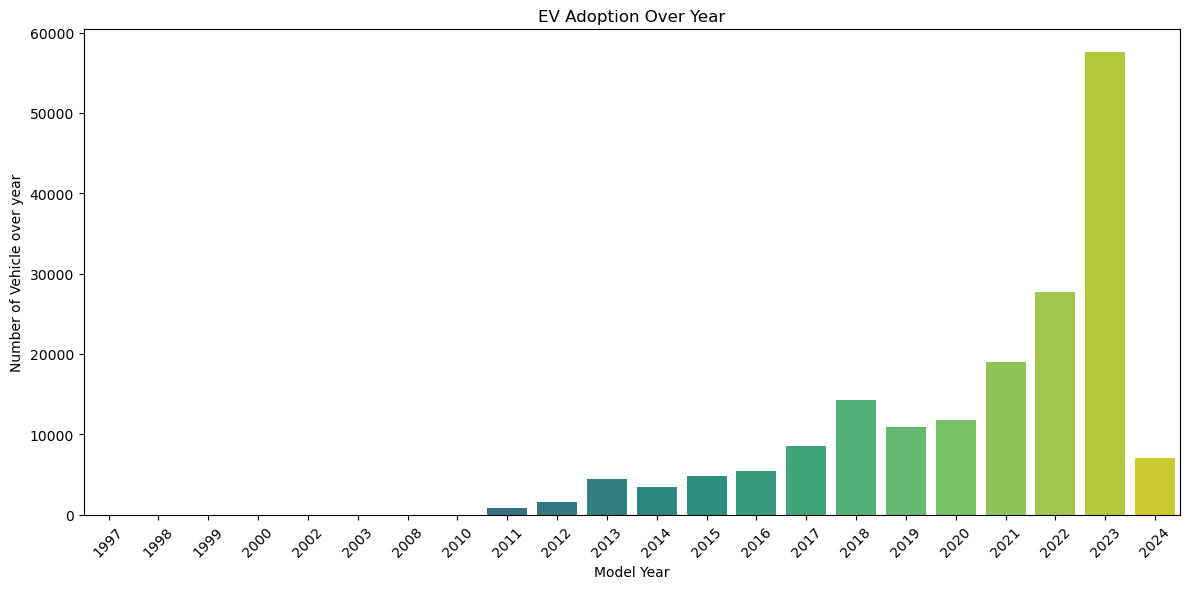

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# EV Adoption Over Time
plt.figure(figsize=(12,6))
ev_adoption_over_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_over_year.index , y =ev_adoption_over_year.values, palette = "viridis")
plt.title("EV Adoption Over Year")
plt.xlabel("Model Year")
plt.ylabel("Number of Vehicle over year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

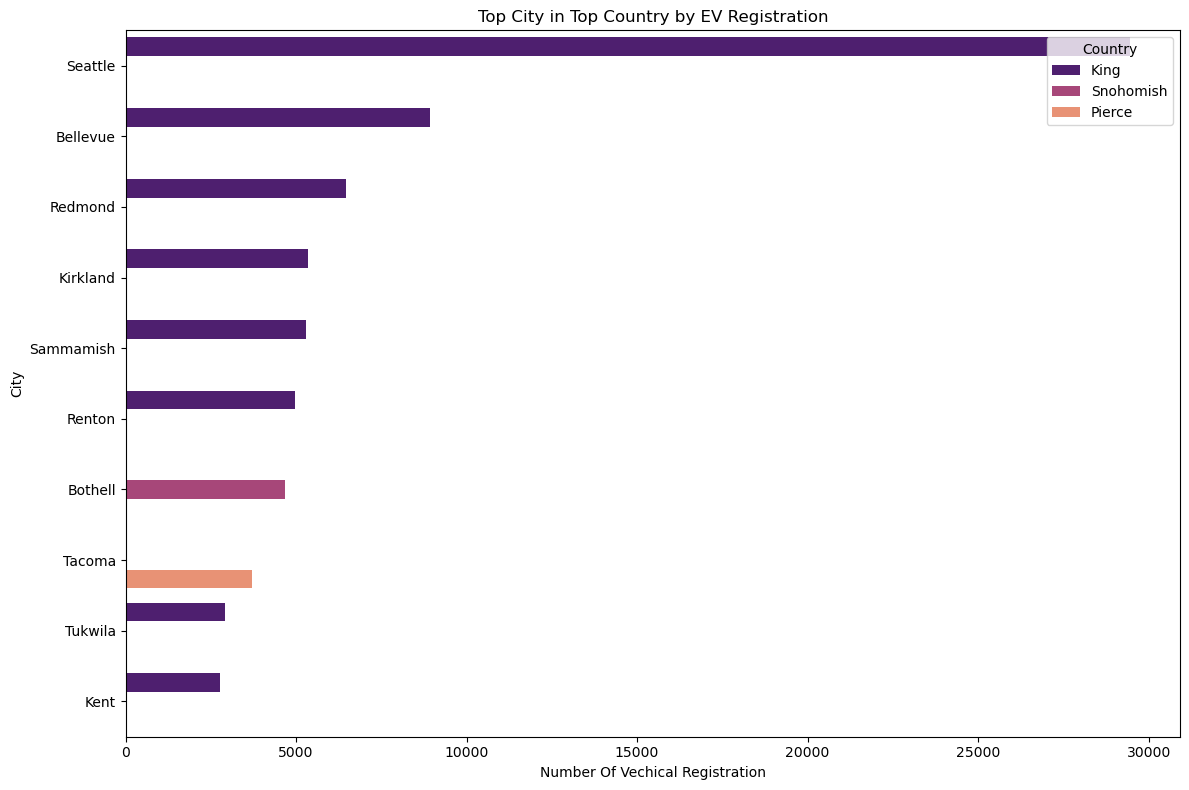

In [87]:
# geographical distribution at county level
ev_country_distribution = ev_data['County'].value_counts()
top_countries =ev_country_distribution.head(3).index

# filtering the dataset for these top counties
ev_topcountry_data = ev_data[ev_data['County'].isin(top_countries)]

# analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_country = ev_topcountry_data.groupby(['County','City']).size().sort_values(ascending = False).reset_index(name = 'Number of Vechical')

# visualize the top 10 cities across these counties
top_city =ev_city_distribution_top_country.head(10)

# plot
plt.figure(figsize=(12,8))
sns.barplot(x ='Number of Vechical', y='City', hue='County', data = top_city, palette = "magma")
plt.title('Top City in Top Country by EV Registration')
plt.xlabel('Number Of Vechical Registration')
plt.ylabel('City')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

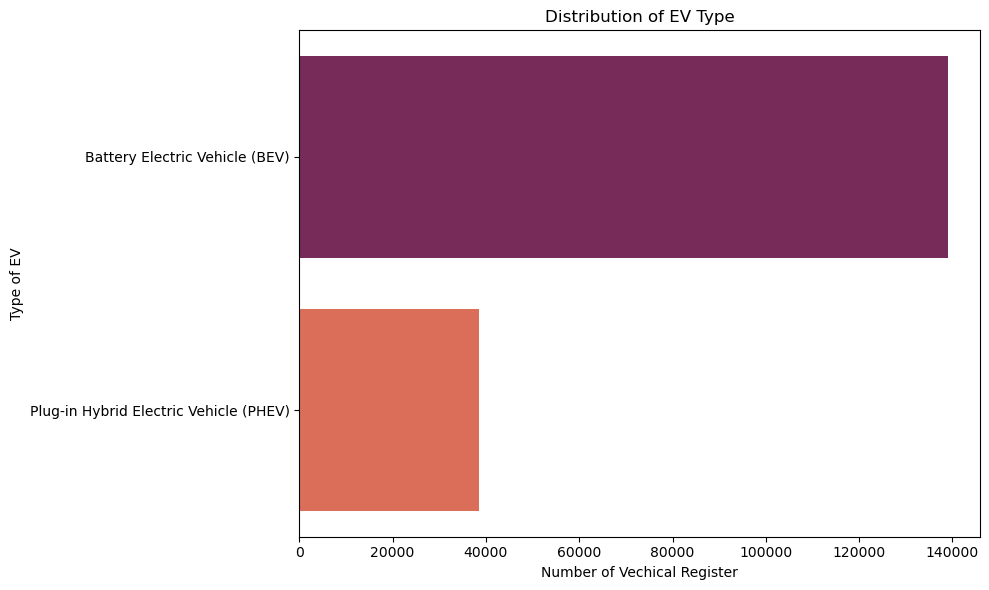

In [88]:
# analyzing the distribution of electric vehicle Types
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize = (10,6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette ="rocket")
plt.title('Distribution of EV Type')
plt.xlabel('Number of Vechical Register')
plt.ylabel('Type of EV')
plt.tight_layout()
plt.show()



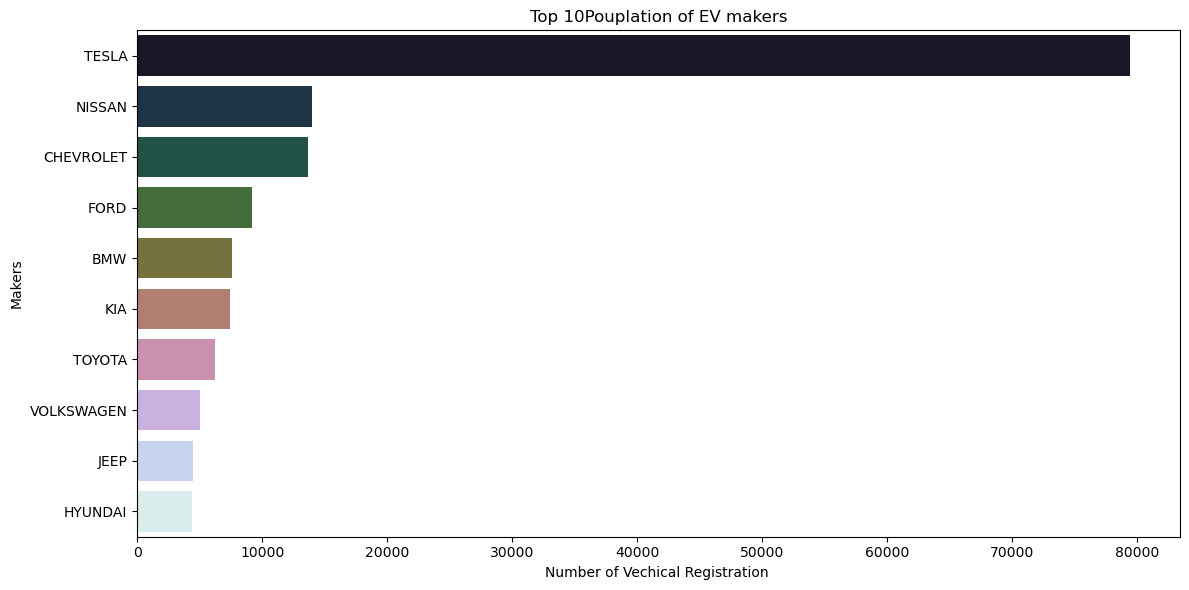

In [89]:
# analyzing the popularity of EV manufacturer
ev_make_distribution = ev_data['Make'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=ev_make_distribution.values , y=ev_make_distribution.index ,palette ='cubehelix' )
plt.title('Top 10Pouplation of EV makers')
plt.xlabel('Number of Vechical Registration ')
plt.ylabel('Makers')
plt.tight_layout()
plt.show()

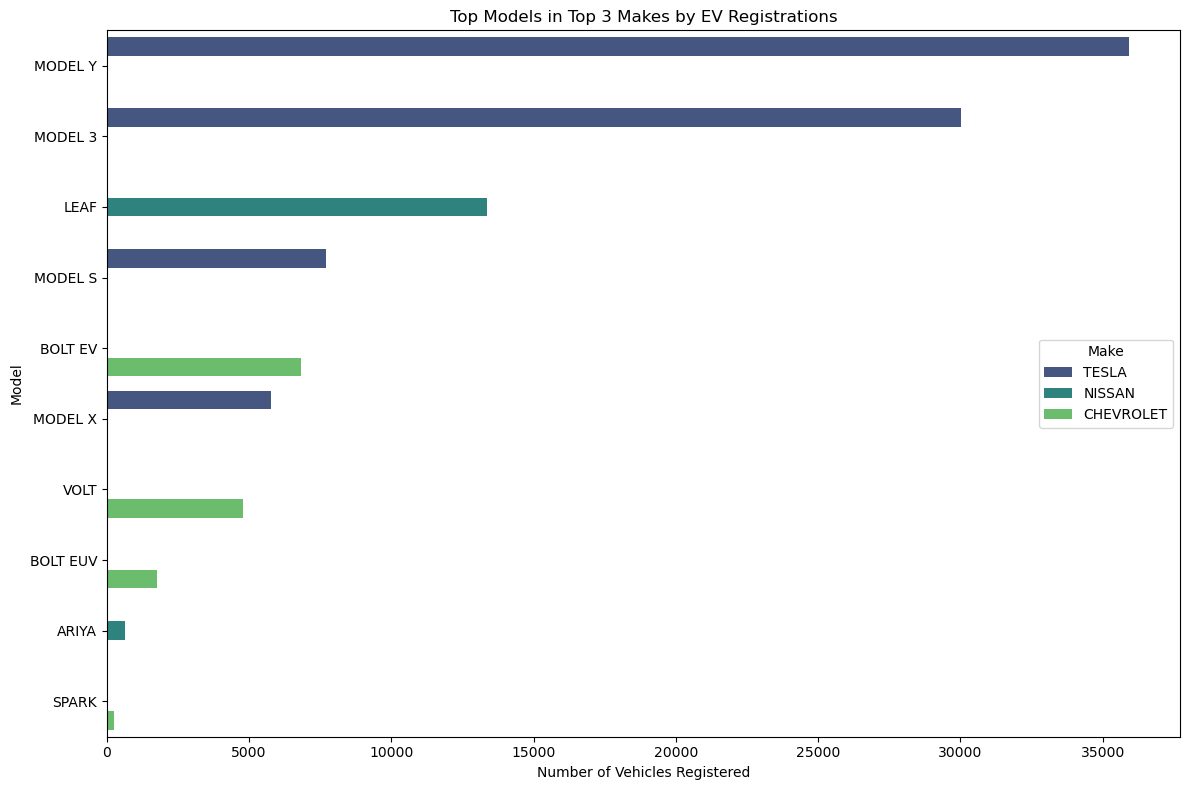

In [90]:
# selecting the top 3 manufacturers based on the number of vehicles registe
top_3_makers= ev_make_distribution.head(3).index

# filtering the dataset for these top manufacturers
top_makers_data = ev_data[ev_data['Make'].isin(top_3_makers)]

# analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makers= top_makers_data.groupby(['Make','Model']).size().sort_values(ascending= False).reset_index(name = 'Number of Vechical')

top_model= ev_model_distribution_top_makers.head(10)
plt.figure(figsize=(12,8))
sns.barplot(x='Number of Vechical', y='Model', hue='Make',data=top_model,palette='viridis')
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make',loc='center right')
plt.tight_layout()
plt.show()

In [91]:
print(top_model.columns)


Index(['Make', 'Model', 'Number of Vechical'], dtype='object')


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


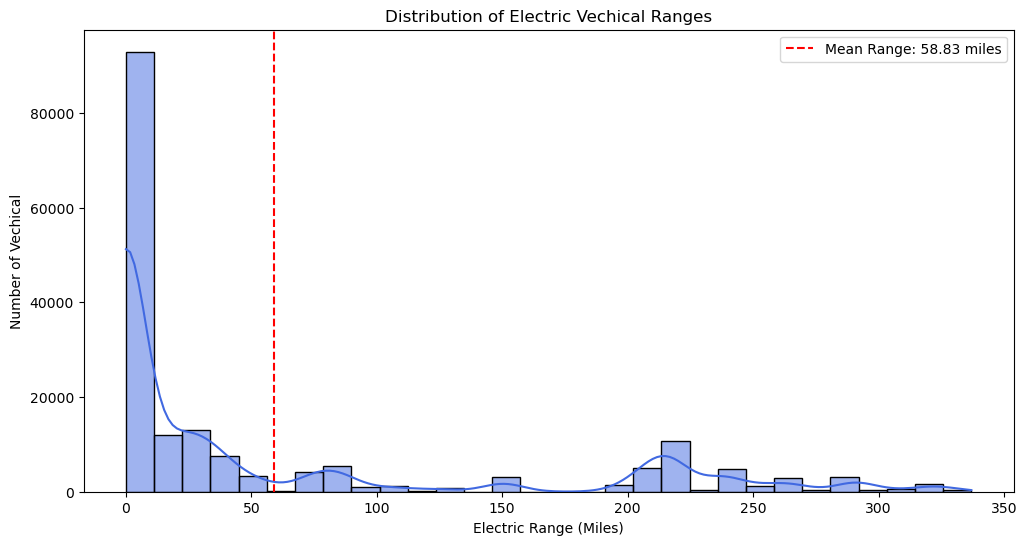

In [92]:
# analyzing the distribution of electric range
plt.figure(figsize =(12,6))
sns.histplot(ev_data['Electric Range'], bins = 30 , kde=True, color ='royalblue')
plt.title('Distribution of Electric Vechical Ranges')
plt.xlabel('Electric Range (Miles)')
plt.ylabel('Number of Vechical')
plt.axvline(ev_data['Electric Range'].mean(), color ='red', linestyle='--', label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


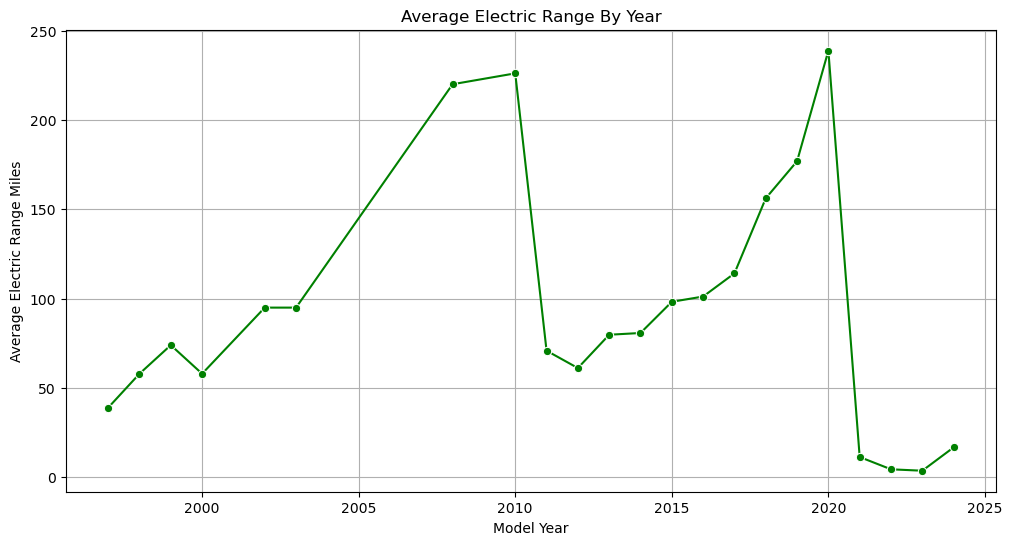

In [93]:
# calculating the average electric range by model year

avg_range_by_year= ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Model Year', y='Electric Range',data=avg_range_by_year, marker ='o',color='green')
plt.title('Average Electric Range By Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range Miles')
plt.grid(True)
plt.show()

In [94]:
print(top_makers_data.columns)

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


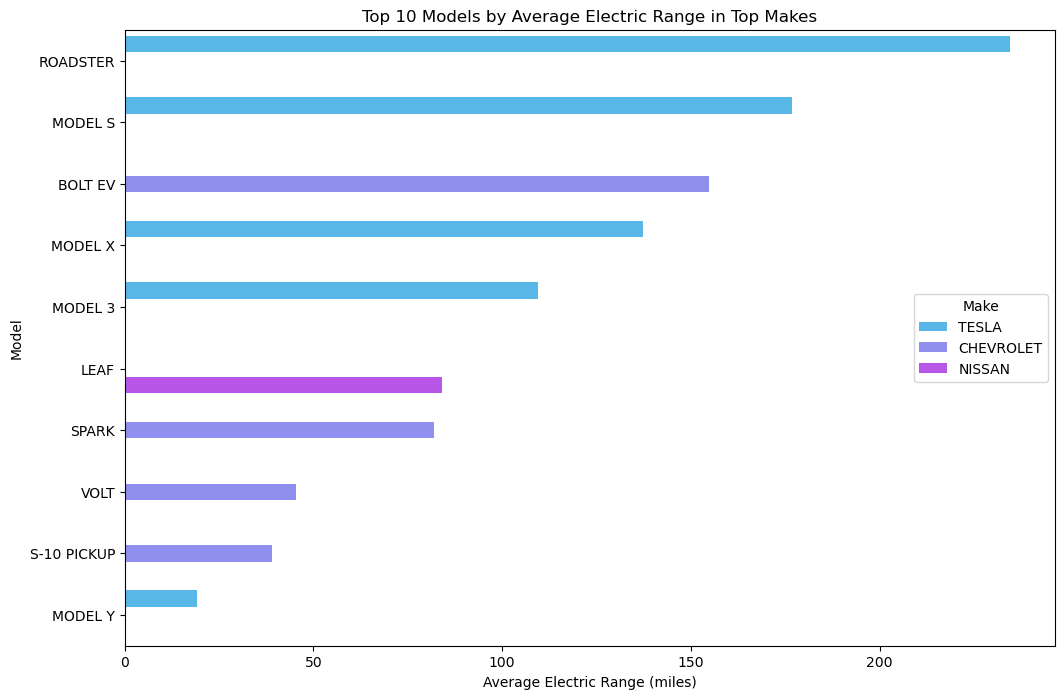

In [95]:
avg_make_by_year= top_makers_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# the top 10 models with the highest average electric range
top_range_model=avg_make_by_year.head(10)

plt.figure(figsize=(12,8))
barplot=sns.barplot(x='Electric Range',y='Model',hue='Make',data=top_range_model,palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make',loc='center right')
plt.show()


In [96]:
# calculate the number of EVs registered each year
ev_registration_count=ev_data['Model Year'].value_counts().sort_index()
print(ev_registration_count)

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64


In [97]:
from scipy.optimize import curve_fit
import numpy as np

#filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtter_year=ev_registration_count[ev_registration_count<=2023]

# define a function for exponential growth to fit the data
def exp_growth(x,a,b):
    return a*np.exp(b * x)

# prepare the data for curve fitting
x_data = filtter_year.index - filtter_year.index.min()
y_data = filtter_year.values

# fit the data to the exponential growth function
params, covers = curve_fit(exp_growth,x_data,y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtter_year.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtter_year.index.min(), forecasted_values))

print(forecasted_evs)



{2024: 213678262.7451077, 2025: 570052435.1470919, 2026: 1520790063.7266371, 2027: 4057174876.084673, 2028: 10823760864.662933, 2029: 28875708549.311325}


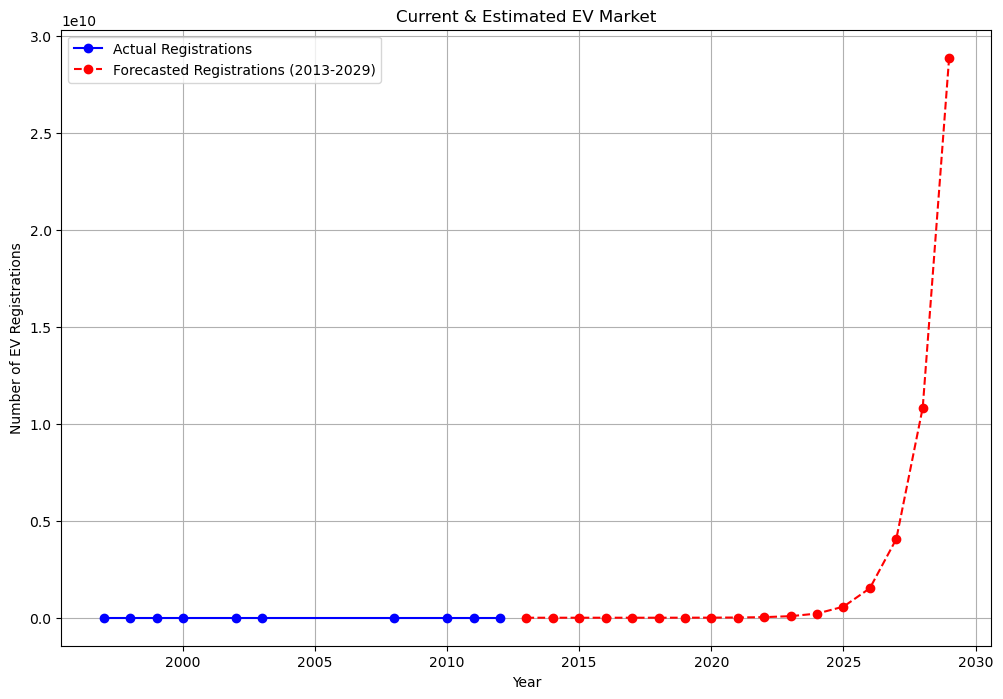

In [98]:
# Fill the gap: predict from 2013 to 2029
full_forecast_years = np.arange(2013, 2029 + 1)

# Convert to relative x for model
relative_years = full_forecast_years - filtter_year.index.min()

# Predict using your model (exp_growth or logistic_growth)
full_forecast_values = exp_growth(relative_years, *params)

# Combine actual and predicted data for continuous plotting
plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(full_forecast_years, full_forecast_values, 'ro--', label='Forecasted Registrations (2013-2029)')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)
plt.show()


In [99]:
print(filtter_year)

Model Year
1997       1
1998       1
1999       5
2000       7
2002       2
2003       1
2008      19
2010      23
2011     775
2012    1614
Name: count, dtype: int64
